In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [6]:
path = 'https://raw.githubusercontent.com/deganza/Loglet-analysis-revisiting-covid19-projections/main/covid_daten_knime.csv'
df_country = pd.read_csv(path)

In [7]:
df_country_exp = pd.DataFrame()

df_country_list = df_country.groupby(['Country']).last().reset_index()
country_list = df_country_list['Country'].to_list()

In [8]:
#df_country_period = df_country[df_country['df_days'] <= 360]
df_country_period = df_country
zeilen = df_country_period['cases'].count()

In [9]:
df_country_period

,Continent,Country,Lat,Long,Date,cases,deaths,cases_lastday,deaths_lastday,increase_cases,increase_deaths,increase_cases_lastday,increase_cases_proz,Max_Date,actual_day,df_days
0,Asia,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,0,0,0,0.000000,2021-01-02,0,346
1,Asia,Afghanistan,33.939110,67.709953,2020-01-23,0,0,0,0,0,0,0,0.000000,2021-01-02,0,345
2,Asia,Afghanistan,33.939110,67.709953,2020-01-24,0,0,0,0,0,0,0,0.000000,2021-01-02,0,344
3,Asia,Afghanistan,33.939110,67.709953,2020-01-25,0,0,0,0,0,0,0,0.000000,2021-01-02,0,343
4,Asia,Afghanistan,33.939110,67.709953,2020-01-26,0,0,0,0,0,0,0,0.000000,2021-01-02,0,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74600,Africa,Zimbabwe,-19.015438,29.154857,2020-12-29,13325,359,13148,354,177,5,71,1.492958,2021-01-02,0,4
74601,Africa,Zimbabwe,-19.015438,29.154857,2020-12-30,13625,360,13325,359,300,1,177,0.694915,2021-01-02,0,3
74602,Africa,Zimbabwe,-19.015438,29.154857,2020-12-31,13867,363,13625,360,242,3,300,-0.193333,2021-01-02,0,2
74603,Africa,Zimbabwe,-19.015438,29.154857,2021-01-01,14084,369,13867,363,217,6,242,-0.103306,2021-01-02,0,1


In [13]:

# Select country or for evaluation of every country remark the variable country_list


#country_list =['Austria','Switzerland','Germany','United Kingdom','Spain']
#country_list =['United Kingdom']
#country_list =['Germany']
#country_list =['Spain']
country_list =['Switzerland']
#country_list =['Poland']
#country_list =['Turkey']
#country_list =['US']


df_country_exp = pd.DataFrame()

#logistic functions

def logistic_function1(x,b1,dt1,K1,b2,dt2,K2,b3,dt3,K3,b4,dt4,K4):
    return K1/(1+np.exp(-np.log2(81)/dt1*(x-b1)))

def logistic_function2(x,b1,dt1,K1,b2,dt2,K2,b3,dt3,K3,b4,dt4,K4):
    return  K1/(1+np.exp(-np.log2(81)/dt1*(x-b1))) + K2/(1+np.exp(-np.log2(81)/dt2*(x-b2)))

def logistic_function3(x,b1,dt1,K1,b2,dt2,K2,b3,dt3,K3,b4,dt4,K4):
    return  K1/(1+np.exp(-np.log2(81)/dt1*(x-b1))) + K2/(1+np.exp(-np.log2(81)/dt2*(x-b2))) + K3/(1+np.exp(-np.log2(81)/dt3*(x-b3)))

def logistic_function4(x,b1,dt1,K1,b2,dt2,K2,b3,dt3,K3,b4,dt4,K4):
    return  K1/(1+np.exp(-np.log2(81)/dt1*(x-b1))) + K2/(1+np.exp(-np.log2(81)/dt2*(x-b2))) + K3/(1+np.exp(-np.log2(81)/dt3*(x-b3))) + K4/(1+np.exp(-np.log2(81)/dt4*(x-b4)))


for country in country_list:

        df_country_modell = df_country_period[df_country['Country'] == country]
     
        expdays = 30
        wave = 0

        datum = pd.date_range(start=df_country_modell['Date'].max(), periods=expdays)
        datum = pd.date_range(start=df_country_modell['Date'].min(),end=datum.max())
        datum = datum.strftime("%Y-%m-%d")
                   
        zeilen= df_country_modell['cases'].count()
        x = np.arange(1,zeilen+1)
        x_exp = np.arange(1, x.max() + expdays  )
        y = df_country_modell['cases'] 
        
        y_min = y.min()
        y = y - y_min
        
              
        try:   
            popt, pcov = curve_fit(logistic_function4, x, y  )
            y_exp = (logistic_function4(x_exp, *popt))    
            
            df = pd.DataFrame({'day':x_exp, 'expected':y_exp,'datum':datum, 'Country' : country})
            df_country_exp = df_country_exp.append(df)
            
            wave=4
            print(country,wave)
    
        except RuntimeError:
            try:
                popt, pcov = curve_fit(logistic_function3, x, y  )
                y_exp = (logistic_function3(x_exp, *popt)) 
    
                df = pd.DataFrame({'day':x_exp, 'expected':y_exp,'datum':datum, 'Country' : country})
                df_country_exp = df_country_exp.append(df)
                
                wave=3
                print(country,wave)
                
            except RuntimeError:
                try:
                    popt, pcov = curve_fit(logistic_function2, x, y  )
                    y_exp = (logistic_function2(x_exp, *popt)) 
    
                    df = pd.DataFrame({'day':x_exp, 'expected':y_exp,'datum':datum, 'Country' : country})
                    df_country_exp = df_country_exp.append(df)
                
                    wave=2
                    print(country,wave)
                  
                except RuntimeError:
                    try:
                        popt, pcov = curve_fit(logistic_function1, x, y  )
                        y_exp = (logistic_function2(x_exp, *popt)) 
    
                        df = pd.DataFrame({'day':x_exp, 'expected':y_exp,'datum':datum, 'Country' : country})
                        df_country_exp = df_country_exp.append(df)
                
                        wave=1
                        print(country,wave)    
                                   
                    except RuntimeError:
                        print(''.join(country) +  ": Error - curve_fit Log failed")
 
            
df_country_exp.reset_index(drop=True, inplace=True)
print('finished')
print(zeilen)

Switzerland 4
finished
347


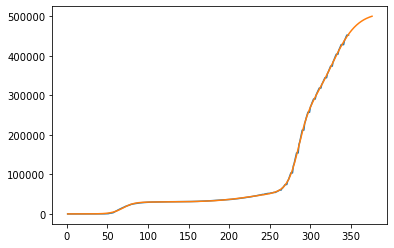

In [14]:
plt.plot(x,y)
plt.plot(x_exp,y_exp)
plt.show()


C:\Users\degan\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


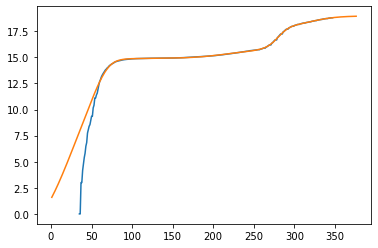

In [15]:
plt.plot(x,np.log2(y))
plt.plot((x_exp), np.log2(y_exp))